In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from typing import List

In [2]:
def load_images(paths_train: List[str], paths_test: List[str]):
    train = []
    test = []
    scaler = StandardScaler()
    for path in paths_train:
        for f in glob.glob(path):
            im = Image.open(f).convert('L')
            im = im.resize((224,224))
            np_im = np.asarray(im, dtype=np.float64)
            np_im = np.reshape(np_im, (-1,))
            train.append(np_im)
    for path in paths_test:
        for f in glob.glob(path):
            im = Image.open(f).convert('L')
            im = im.resize((224,224))
            np_im = np.asarray(im, dtype=np.float64)
            np_im = np.reshape(np_im, (-1,))
            test.append(np_im)
    train = scaler.fit_transform(train)
    test = scaler.transform(test)
    return train, test, scaler

In [3]:
train_paths = [
    './PlantDoc-Dataset/train/tomato_leaf_late_blight/*.jpg',
    './PlantDoc-Dataset/train/tomato_leaf_bacterial_spot/*.jpg',
    './PlantDoc-Dataset/train/tomato_leaf_mosaic_virus/*.jpg'
]

test_paths = [
    './PlantDoc-Dataset/test/tomato_leaf_late_blight/*.jpg',
    './PlantDoc-Dataset/test/tomato_leaf_bacterial_spot/*.jpg',
    './PlantDoc-Dataset/test/tomato_leaf_mosaic_virus/*.jpg'
]
train, test, scaler = load_images(train_paths, test_paths)

In [4]:
cov_mat = np.cov(train)
print(cov_mat.shape)
cov_mat

(246, 246)


array([[ 0.58778317, -0.03639765, -0.03779049, ..., -0.04069516,
        -0.06232658,  0.159627  ],
       [-0.03639765,  0.92103389,  0.00127445, ..., -0.00544374,
        -0.08431607, -0.00983805],
       [-0.03779049,  0.00127445,  0.80591129, ..., -0.05263242,
         0.10599832, -0.03044791],
       ...,
       [-0.04069516, -0.00544374, -0.05263242, ...,  0.89144378,
         0.00704473, -0.19972032],
       [-0.06232658, -0.08431607,  0.10599832, ...,  0.00704473,
         1.24928629, -0.02956155],
       [ 0.159627  , -0.00983805, -0.03044791, ..., -0.19972032,
        -0.02956155,  0.59483952]])

In [5]:
mean_img = np.reshape(scaler.mean_, (224, 224)).astype('int32')

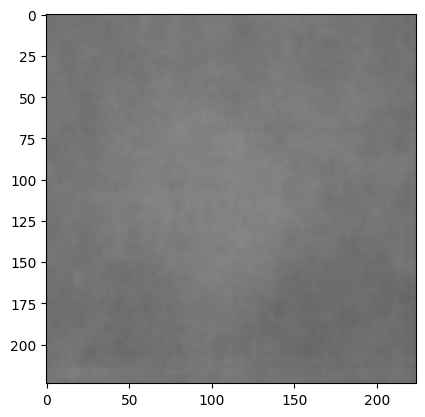

In [6]:
img = Image.fromarray(mean_img)
plt.imshow(img)

In [25]:
pca = PCA()
train_pca = pca.fit_transform(train)
pca.explained_variance_ratio_.shape

(246,)

In [26]:
np.cov(train_pca)

array([[125.63345672, -28.40478061,  -7.24671263, ...,   6.71777821,
         -5.53438428,  26.06746981],
       [-28.40478061, 271.30356939,  -1.60123815, ..., -61.39379431,
        -46.93544616,  24.383508  ],
       [ -7.24671263,  -1.60123815, 165.08084434, ...,  -9.33066219,
         22.49341627,  -6.85694742],
       ...,
       [  6.71777821, -61.39379431,  -9.33066219, ..., 225.54023652,
         21.81587466, -59.86105238],
       [ -5.53438428, -46.93544616,  22.49341627, ...,  21.81587466,
        264.86825497, -15.15521924],
       [ 26.06746981,  24.383508  ,  -6.85694742, ..., -59.86105238,
        -15.15521924, 130.16447022]])

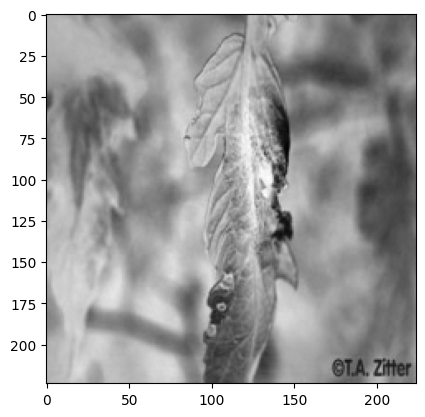

In [27]:
train_pca_recovered = pca.inverse_transform(train_pca)
im_rec = train_pca_recovered[0].reshape(224, 224)
plt.imshow(im_rec, cmap='gray_r')


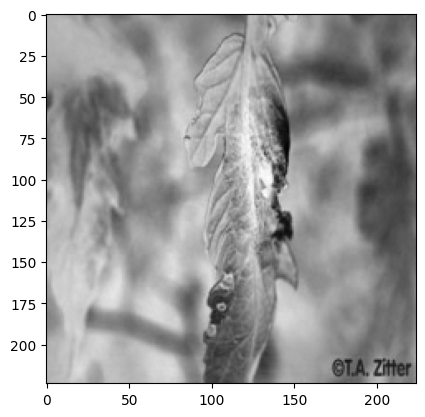

In [28]:
im = train[0].reshape(224, 224)
plt.imshow(im, cmap='gray_r')

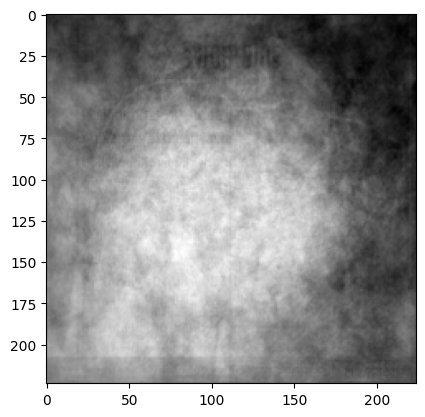

In [15]:
pca3 = PCA(n_components=3)
train_pca3 = pca3.fit_transform(train)
train_pca3_recovered = pca3.inverse_transform(train_pca3)
im_rec3 = train_pca3_recovered[0].reshape(224, 224)
plt.imshow(im_rec3, cmap='gray_r')

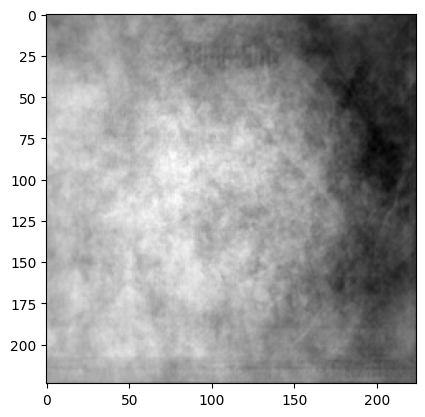

In [16]:
pca9 = PCA(n_components=9)
train_pca9 = pca9.fit_transform(train)
train_pca9_recovered = pca9.inverse_transform(train_pca9)
im_rec9 = train_pca9_recovered[0].reshape(224, 224)
plt.imshow(im_rec9, cmap='gray_r')

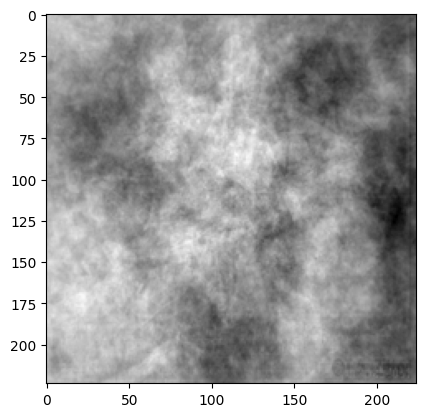

In [17]:
pca27 = PCA(n_components=27)
train_pca27 = pca27.fit_transform(train)
train_pca27_recovered = pca27.inverse_transform(train_pca27)
im_rec27 = train_pca27_recovered[0].reshape(224, 224)
plt.imshow(im_rec27, cmap='gray_r')